# Pyplot 教程

## pyplot介绍

matplotlib.pyplot是命令式函数的集合，使matplotlib用起来像MATLAB一样。每个pyplot函数（方法）会对图表（状态）进行更改：例如，创建图表，在图表中创建绘图区域、在绘图区域中绘制线条，使用标签装饰图表等。

在matplotlib.pyplot中，各种状态在函数调用中保留，以跟踪当前图表（figure）和绘图区域（plotting area）等内容。绘图函数总是针对当前坐标系（Axes）。

使用pyplot进行可视化操作非常快捷，如：

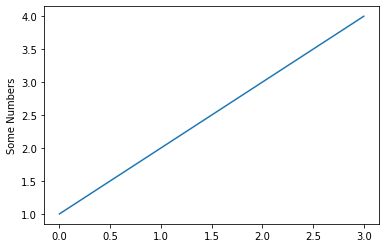

In [15]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('Some Numbers')
plt.show()

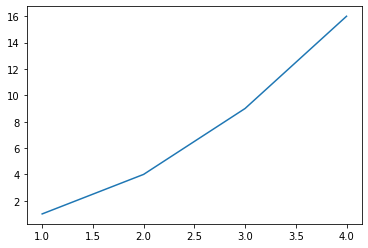

In [18]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

### 格式化图形样式

对于每对x, y参数，可选的第三个参数为用来指示图的颜色和线型的格式字符串。如：

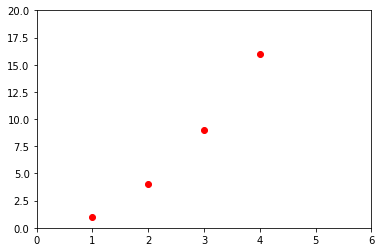

In [24]:
x = list(range(1, 5))
y = [t ** 2 for t in x]

# 'ro': red circle
plt.plot(x, y , 'ro')

# 坐标轴的范围（视区，Viewport)
xmin, xmax = 0, 6
ymin, ymax = 0, 20
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

所有序列在内部转换为numpy数组，因此，最好使用numpy数组作为matplotlib的输入。如：

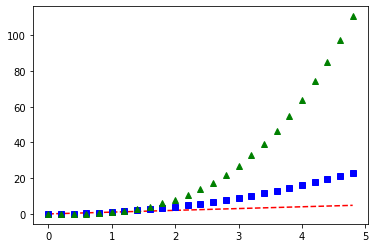

In [16]:
import numpy as np

t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## 使用关键字字符串绘图

可使用data关键字参数指定像numpy.recarray和pandas.DataFrame对象作为图表数据，并使用字符串关键字访问特定变量的数据。如：

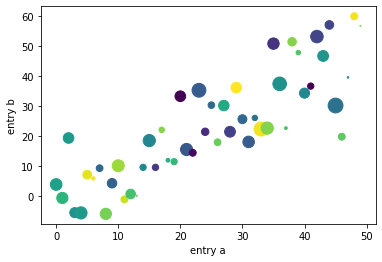

In [6]:

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# 'a' 的值用于x，'b'的值用于y，'c'的值用于颜色参数，'d'的值用于大小
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## 使用分类变量绘图

可以直接将分类变量传递给绘图函数

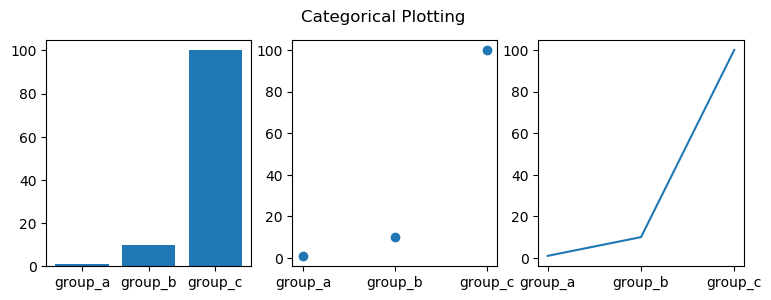

In [25]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

# 图表大小 900 * 300
plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 设置线条属性

线条对象有很多属性可以设置，如线宽，线型，抗锯齿等。具体可参考matplotlib.lines.Line2D。设置线条属性的方法有：

* 使用关键字参数:

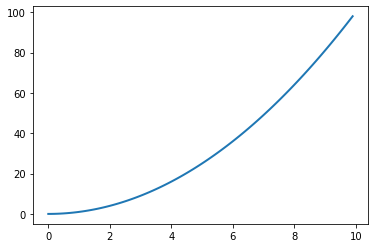

In [28]:
x = np.arange(0, 10, 0.1)
# 设置线宽
plt.plot(x, x ** 2, linewidth=2.0)
plt.show()

* 使用Line2D实例的setter方法. 注意：pyplot.plot方法会返回Line2D对象的列表：

list

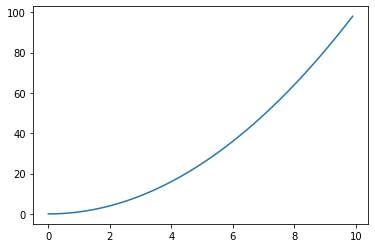

In [31]:
lines = plt.plot(x, x**2, '-')
type(lines)

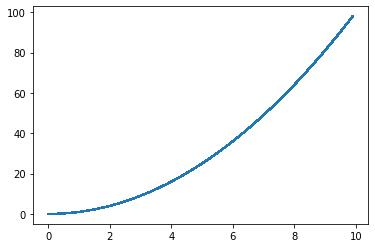

In [9]:
line, = plt.plot(x, x**2, '-')
line.set_antialiased(False) # 关闭反锯齿

* 使用setp()命令，如：

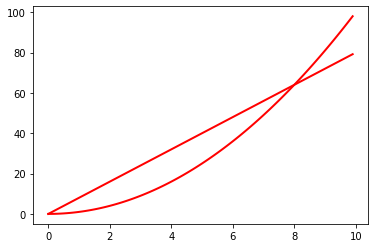

In [33]:
lines = plt.plot(x, x**2, x, 8 * x)
# 使用关键字参数
plt.setp(lines, color='r', linewidth=2.0)
# 或者matlab风格的键值对
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
plt.show()

可使用setp()函数查看可设置线条属性的列表：

In [13]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

## 使用多个图表和坐标系

pyplot具有当前图表和当前坐标系的概念。plt.gca()返回当前坐标系(Axes)，plt.gcf()返回当前图标。这允许创建多个子图（subplot）：

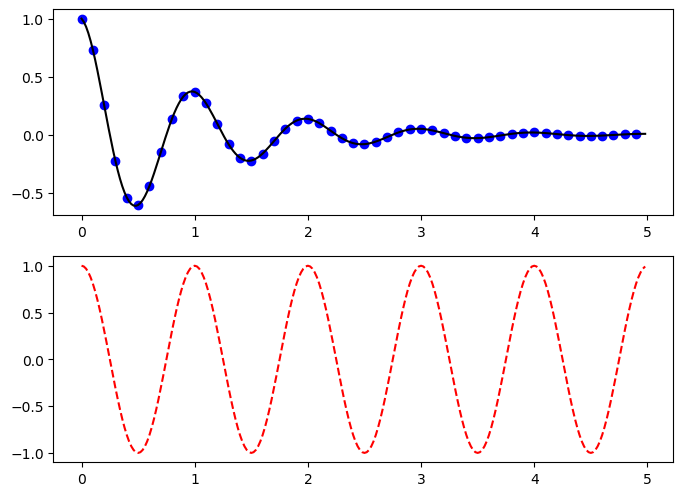

In [39]:
def f(x):
    return np.exp(-x) * np.cos(2 * np.pi * x)

x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(8, 6), dpi=100)

num_rows = 2
num_cols = 1

plt.subplot(num_rows, num_cols, 1)
plt.plot(x1, f(x1), 'bo', x2, f(x2), 'k')

plt.subplot(num_rows, num_cols, 2)
plt.plot(x2, np.cos(2 * np.pi * x2), 'r--')
plt.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


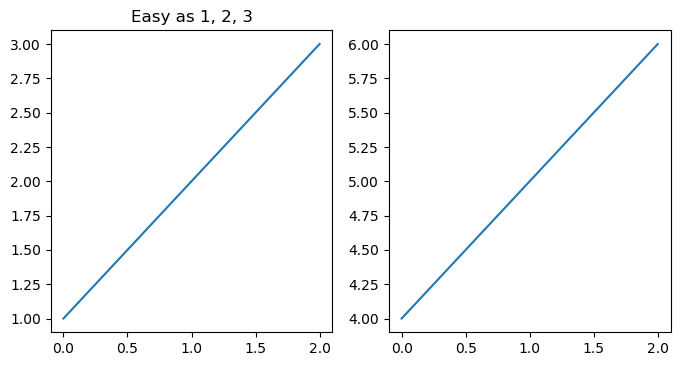

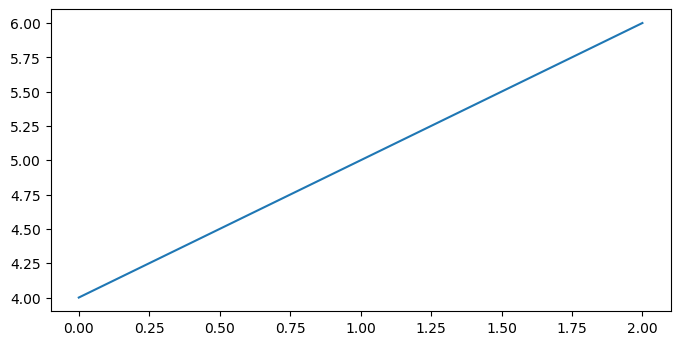

In [50]:
# first figure
plt.figure(1, figsize=(8,4), dpi=100)
plt.subplot(121)
plt.plot([1,2,3])
plt.subplot(122)
plt.plot([4,5,6])

# second figure
plt.figure(2, figsize=(8,4), dpi=100)
plt.plot([4,5,6])

plt.figure(1) # first figure as current
plt.subplot(121)
plt.title('Easy as 1, 2, 3')
plt.show()

## 使用文本

text()命令可用于在任意位置添加文本，而xlabel(), ylabel()和title()用于在特定位置添加文本。如：

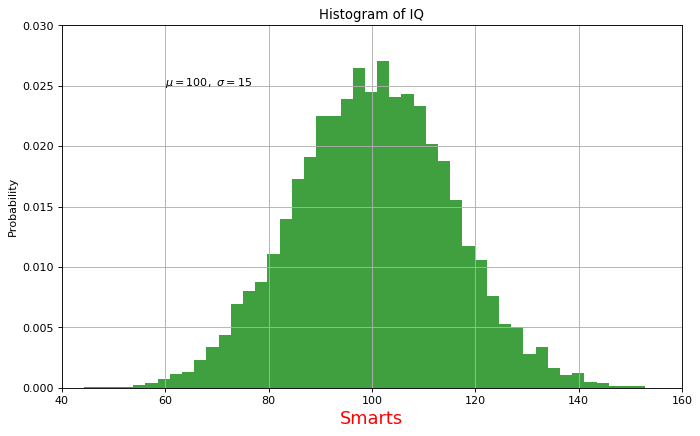

In [58]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
plt.figure(figsize=(10,6), dpi=80)

n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts', fontsize=16, color='red')
plt.ylabel('Probability')

plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100, \ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 文本中使用数学表达式

matplotlib支持在任何文本中包含TeX数学公式。如，要在标题中写入表达式 $\sigma_i=15$, 可以编写由$符号包围的Tex表达式：

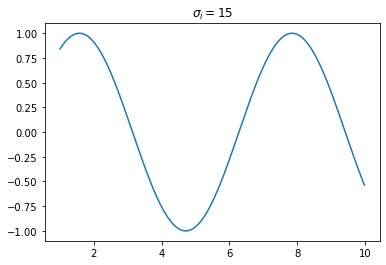

In [62]:
plt.title(r'$\sigma_i=15$')
x = np.arange(1, 10, 0.01)
plt.plot(x, np.sin(x))
plt.show()

### 文本注释

上述的基本text()命令可将文本放在坐标系Axes的任意位置。文本经常用来对图表进行注释，annotate()方法便提供了此功能：

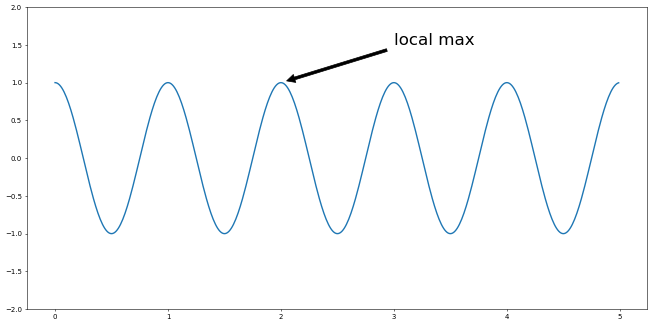

In [68]:
plt.figure(figsize=(16, 8), dpi=50)
ax = plt.subplot(111)
x = np.arange(0.0, 5.0, 0.01)
y = np.cos(2 * np.pi * x)
line, = plt.plot(x, y, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=24)
plt.ylim(-2, 2)
plt.show()

## 对数和其他非线性坐标系

matplotlob.pyplot不仅支持线性轴刻度，还支持对数和logit（S曲线）刻度。如果数据（指数）跨域许多数量级，则需要这种非线性轴。可通过:
plt.xscale('log')改变轴刻度。如：

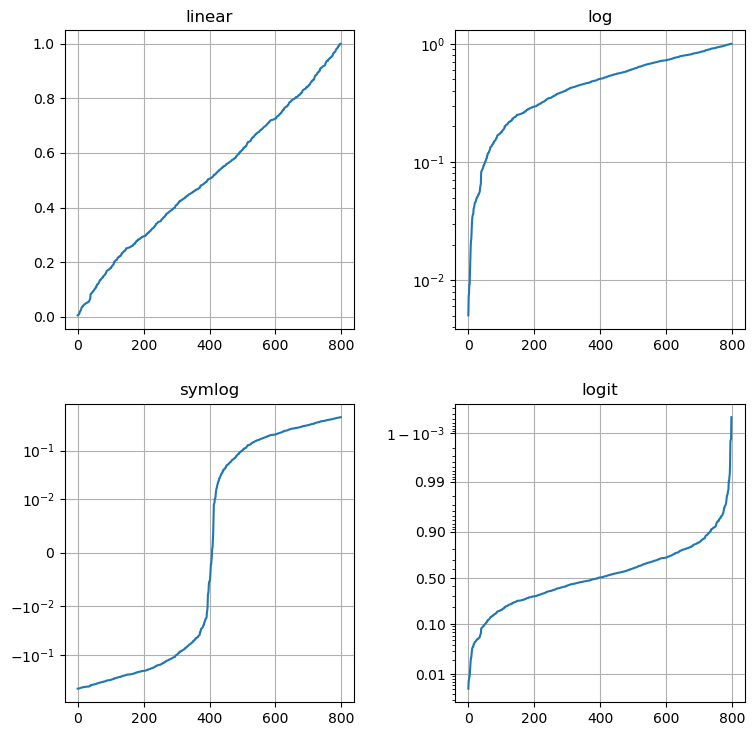

In [71]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(8, 8), dpi=100)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()